Pankajan .T
190428D

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from plyfile import PlyData, PlyElement

In [5]:
pcd = PlyData.read(r'airplane.ply')

points = np.concatenate((pcd['vertex']['x'].reshape(1,-1),pcd['vertex']['y'].reshape(1,-1),pcd['vertex']['z'].reshape(1,-1)),axis = 0)

points  = points - np.mean(points,axis = 1).reshape(3,1)

NameError: name 'points' is not defined

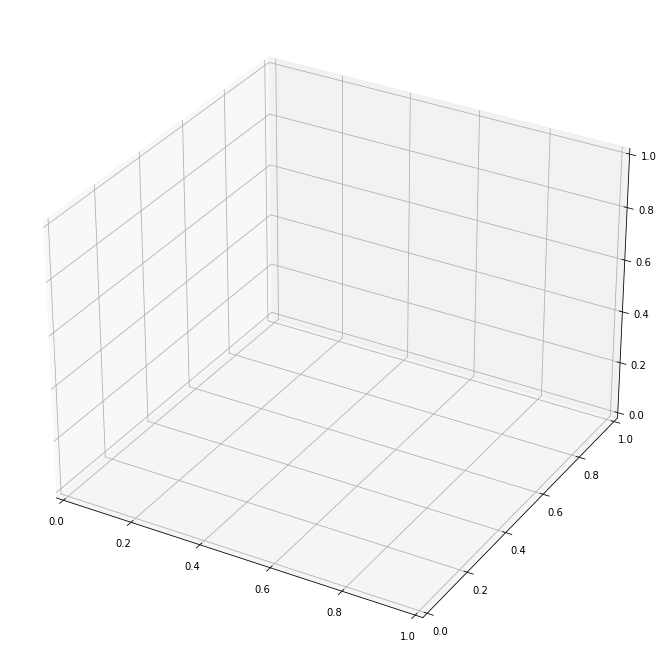

In [4]:
fig = plt.figure(figsize = (12,12))

ax = fig.add_subplot(111,projection = '3d')

ax.scatter(points[0,:],points[1,:],points[2,:])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

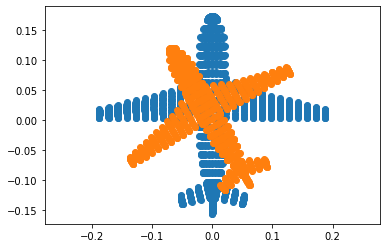

In [6]:
ones=np.ones((1,points.shape[1]))
X=np.concatenate((points,ones),axis=0)

R=np.array([[1,0,0],[0,1,0],[0,0,1]])
K=np.array([[1,0,0],[0,1,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])

P1=K @ np.concatenate((R,t),axis=1)


titz = 30*np.pi/180

R=np.array([[np.cos(titz),-np.sin(titz),0],[np.sin(titz),np.cos(titz),0],[0,0,1]])
K=np.array([[0.8,0,0],[0,0.8,0],[0,0,1]])
t=np.array([[0],[0],[-4000]])

P2=K @ np.concatenate((R,t),axis=1)

x1=P1@X
x2=P2@X
x1=x1/x1[2,:]
x2=x2/x2[2,:]

fig,ax=plt.subplots(1,1,sharex=True,sharey=True)
ax.scatter(x1[0,:],x1[1,:])
ax.scatter(x2[0,:],x2[1,:])
ax.axis("equal")
plt.show()

item 1 ,area in pixels = 59143
item 1 ,area in mm^2 = 2318.642172
item 2 ,area in pixels = 59211
item 2 ,area in mm^2 = 2321.3080440000003


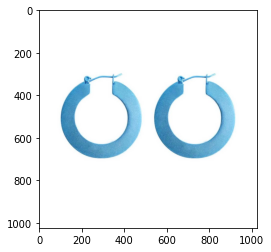

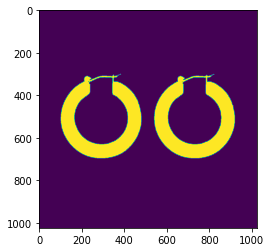

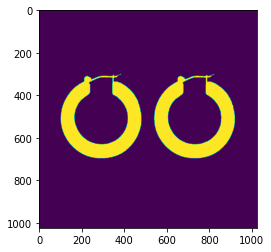

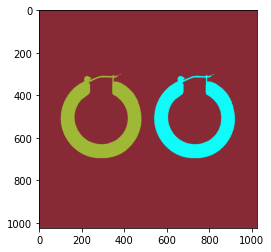

In [7]:
im = cv.imread(r'earrings.jpg',cv.IMREAD_COLOR)

hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
th , bw = cv.threshold(hsv[:,:,1],0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)


w = 5
kernel = np.ones((w,w),np.uint8)
opened = cv.morphologyEx(bw,cv.MORPH_CLOSE,kernel)

retval , labels,stats ,centroids = cv.connectedComponentsWithStats(bw)
colormapped = cv.applyColorMap((labels/np.amax(labels)*255).astype('uint8'),cv.COLORMAP_PARULA)


Z = 720
f = 8
for i,s in enumerate(stats):
    if i!=0:
        print('item',i,',area in pixels =',s[4])
        print('item',i,',area in mm^2 =',s[4]*(2.2e-3)**2*(Z*Z)/(f*f))

plt.imshow(im)
plt.show()
plt.imshow(bw)
plt.show()
plt.imshow(opened)
plt.show()
plt.imshow(colormapped)
plt.show()